luminance = 76
dynamic = [52 , 154]
image contarst = 0.495
standard deviation = 20.917


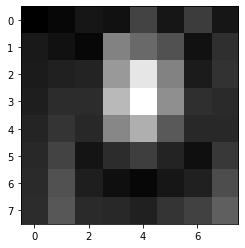

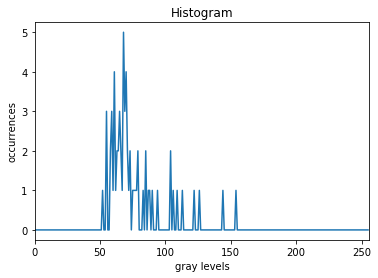

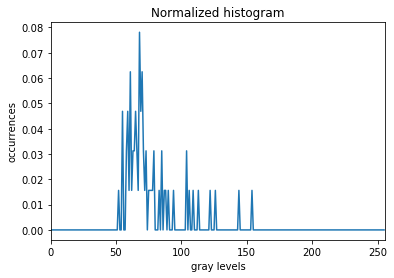

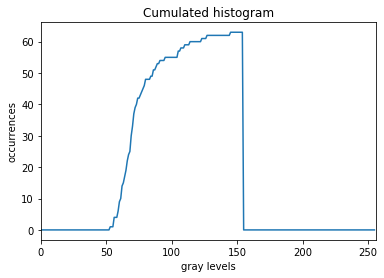

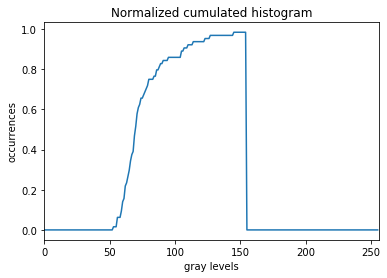

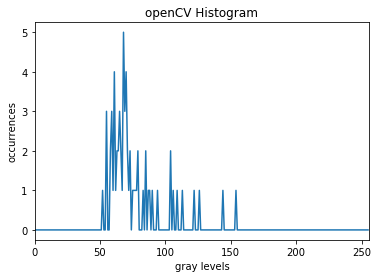

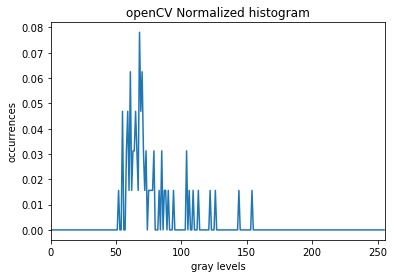

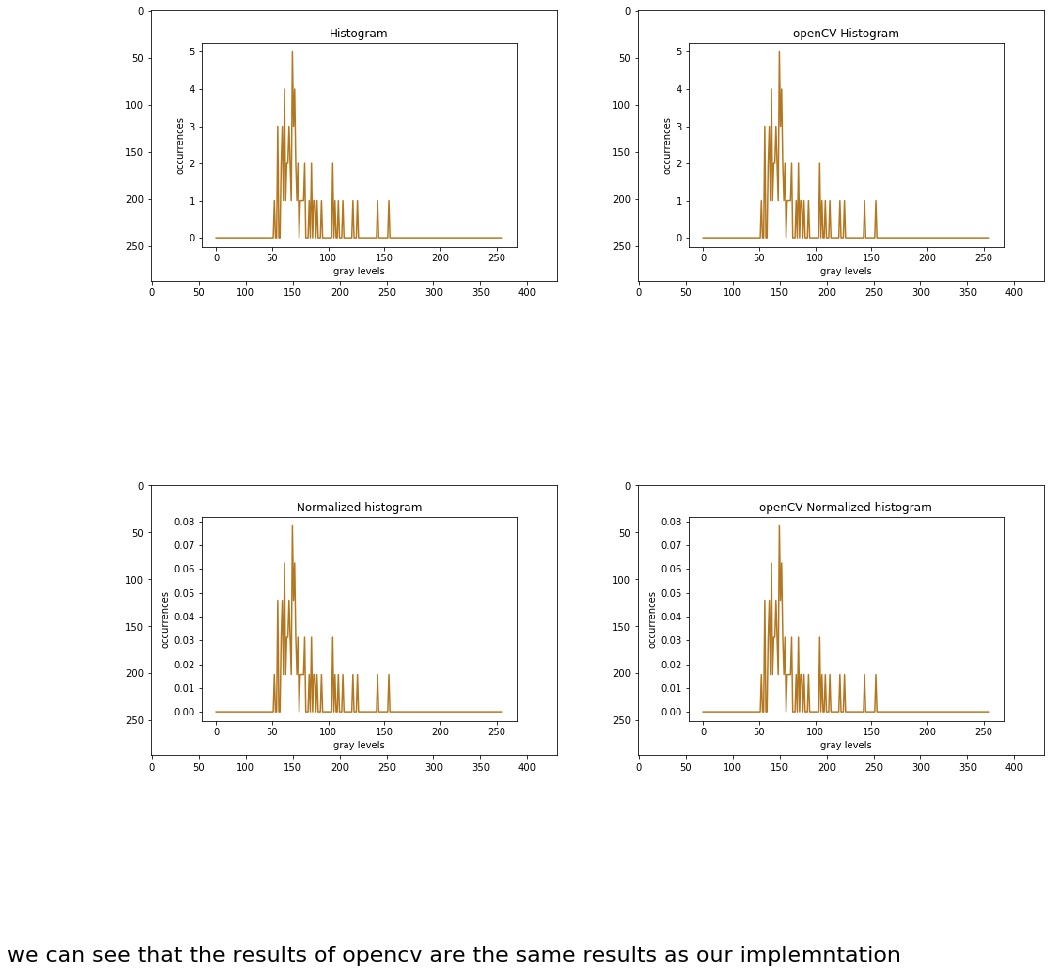

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

#the function which is gonna be used to display and save the images (histograms).ipynb_checkpoints
def displayHist(**myArgs):
    plt.figure()
    plt.title(myArgs['title'])
    plt.xlabel('gray levels')
    plt.ylabel('occurrences')
    plt.plot(myArgs['x'],myArgs['y'])
    plt.savefig(myArgs['imgName'])
    plt.xlim([0, 256])

def cv2DisplayHist(**myArgs):
    plt.figure()
    plt.title(myArgs['title'])
    plt.xlabel('gray levels')
    plt.ylabel('occurrences')
    plt.plot(myArgs['hist'])
    plt.savefig(myArgs['imgName'])
    plt.xlim([0, 256])

#reading the image
image = np.genfromtxt('image.csv', delimiter=';')
#displaying the image
plt.imshow(image,cmap='gray')
#first we should extract the height and the width of the image because we gonna need them a lot 
imageHeight = image.shape[0]
imageWidth = image.shape[1]
#Calculating the metrixs on the image
    #image luminance: we can get it directly using the built in function np.mean(image)
    #first we calculate the sum of the image elements
    #we can do that using the built in function np.sum(image) which will give us the same exact result
elementsSum=0
for i in range(0,imageHeight):
    for j in range(0,imageWidth):
        elementsSum += image.item(i,j)
    #calculating the luminance by dividing the sum by the definition of the image
luminance = int(elementsSum / (imageHeight * imageWidth))
#displaying the result
print("luminance = "+str(luminance))

#calculating and displaying the image dynamics
max = 0
min = 255
    #we gonna cycle through the elemnts of the matrix in order to find the min and the max values.
    #or we can use the built in functions np.amin(image) and np.amax(image) to get the values directly
for i in range(0,imageHeight):
    for j in range(0,imageWidth):
        if(image.item(i,j) > max ) : max=int(image.item(i,j)) #updating the value of the max
        if(image.item(i,j) < min ) : min=int(image.item(i,j)) #updating the value of the min
print("dynamic = ["+str(min)+" , "+str(max)+"]")

#calculating and displaying the image contrast
imageContrast = round((max - min) / (max + min),3)
print("image contarst = "+str(imageContrast))

#Calculating and displaying the standard deviation of the gray levels
    #first we gonna calculate the following sum : (I(x,y) - moy)^2 then we devide it by the definition of the image
    #or we can use the built in function np.std(image) which will give us the same result.
standardDeviationSum =0
for i in range(0,imageHeight):
    for j in range(0,imageWidth):
        standardDeviationSum += (int(image.item(i,j))-luminance) ** 2 
standardDeviation = round(math.sqrt(standardDeviationSum / (imageHeight * imageWidth)),3)
print("standard deviation = "+str(standardDeviation))

#Histogram and cumulated histogram
    #Constructing and displaying the histogram of the image
pixels = []
occurrences = [0] * 256
for i in range(0,256):
  pixels.append(i)

for i in range(0,imageHeight):
    for j in range(0,imageWidth):
        occurrences[int(image.item(i,j))] = occurrences[int(image.item(i,j))] +1
displayHist(title = 'Histogram', x = pixels, y = occurrences, imgName = 'imageHistogram.png')

    #Constructing and displaying the normalized histogram of the image
normalizedOccurrences = []
for i in range(0,len(occurrences)):
    normalizedOccurrences.append(occurrences[i] / (imageHeight * imageWidth))
displayHist(title = 'Normalized histogram', x = pixels, y = normalizedOccurrences, imgName = 'imageNormalizedHistogram.png')

#Constructing and displaying the cumulated histogram of the image as well as its normalized cumulated histogram
    #Constructing and displaying the cumulated histogram of the image
cumulatedOccurrences = [0] * 256
for i in range(1,155):
    for j in range(0,i):
        cumulatedOccurrences[i] += occurrences[j]
displayHist(title = 'Cumulated histogram', x = pixels, y = cumulatedOccurrences, imgName = 'imageCumulatedHistogram.png')

    #Constructing and displaying the normalized cumulated histogram
cumulatedNormalizedOccurrences = [0] * 256
for i in range(1,155):
    for j in range(0,i):
        cumulatedNormalizedOccurrences[i] += normalizedOccurrences[j]
displayHist(title = 'Normalized cumulated histogram', x = pixels, y = cumulatedNormalizedOccurrences, imgName = 'imageCumulatedNormalizedHistogram.png')

#calculating the histograms using opencv functions
    #histogram
image1= image.astype('uint8')
cv2Hist = cv2.calcHist([image1], [0], None, [256], [0, 256])
cv2DisplayHist(title = 'openCV Histogram', hist = cv2Hist, imgName = 'cv2ImageHistogram.png')
    
    #Normalized histogram
cv2NormalisedHist = cv2Hist/cv2Hist.sum()
cv2DisplayHist(title = 'openCV Normalized histogram', hist = cv2NormalisedHist, imgName = 'cv2ImageNormalizedHistogram.png')
f, axarr = plt.subplots(2,2)

#Displaying the results of our implementation side by side with the opencv functions results 
#in order to visualize if the results are the same or there is differences.
f.set_figheight(16)
f.set_figwidth(16)
f.text(0,0,'we can see that the results of opencv are the same results as our implemntation',fontsize = 22)
axarr[0,0].imshow(cv2.imread('imageHistogram.png'))
axarr[0,1].imshow(cv2.imread('cv2ImageHistogram.png'))
axarr[1,0].imshow(cv2.imread('imageNormalizedHistogram.png'))
axarr[1,1].imshow(cv2.imread('cv2ImageNormalizedHistogram.png'))